## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [18]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.40180911, 0.29349205, 0.30469884])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [3]:
np.sum(weights * log_returns.mean()) * 250

0.15736976113740123

Expected Portfolio Variance:

In [4]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.04268473746271718

Expected Portfolio Volatility:

In [5]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.20660284959970224

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [19]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [20]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.07080478137267156,
  0.07097999994867572,
  0.13094727931837394,
  0.09814656177524575,
  0.09504312085655478,
  0.1034771897392357,
  0.025346856945550177,
  0.1462901161663001,
  0.09772638287448306,
  0.10356159298623066,
  0.14159649697068605,
  -0.009729899834251125,
  0.103227660401132,
  0.04609611281501779,
  0.06879787342206813,
  0.08371026063252505,
  0.08636806737649322,
  0.10935567861868775,
  0.09912565139281748,
  0.13693540533282222,
  0.09899943952901788,
  0.08740647066932042,
  0.07783108822459665,
  0.1615243044568457,
  0.17705663525170698,
  0.09121584521938536,
  -0.00612831261406016,
  0.1296136367101006,
  0.08479184128982886,
  0.07343367179529132,
  0.10908258008369187,
  0.1359828029335961,
  -0.019107912886447115,
  0.07624486475382602,
  0.05973668791067463,
  0.09138537189178417,
  0.08813140045598325,
  0.04756904514536271,
  0.17386437941849694,
  0.08891953514175158,
  0.1020524381150036,
  0.08597942655419459,
  0.14705686209010796,
  0.119560591

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [21]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([ 0.07080478,  0.07098   ,  0.13094728,  0.09814656,  0.09504312,
         0.10347719,  0.02534686,  0.14629012,  0.09772638,  0.10356159,
         0.1415965 , -0.0097299 ,  0.10322766,  0.04609611,  0.06879787,
         0.08371026,  0.08636807,  0.10935568,  0.09912565,  0.13693541,
         0.09899944,  0.08740647,  0.07783109,  0.1615243 ,  0.17705664,
         0.09121585, -0.00612831,  0.12961364,  0.08479184,  0.07343367,
         0.10908258,  0.1359828 , -0.01910791,  0.07624486,  0.05973669,
         0.09138537,  0.0881314 ,  0.04756905,  0.17386438,  0.08891954,
         0.10205244,  0.08597943,  0.14705686,  0.11956059,  0.06964623,
        -0.01716784,  0.08987979,  0.0422021 ,  0.0723042 ,  0.10400004,
         0.10594362,  0.09411419,  0.03468437,  0.12961404,  0.13555282,
         0.0074914 ,  0.10057597,  0.10392034,  0.14022497,  0.05183363,
         0.11044474,  0.05918203,  0.10702079,  0.03997948,  0.09315291,
         0.03957259,  0.14262101,  0.09605979,  0.2

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [22]:
portfolios = pd.DataFrame({'Return':pf_returns,'Volatility':pf_volatilities})

Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

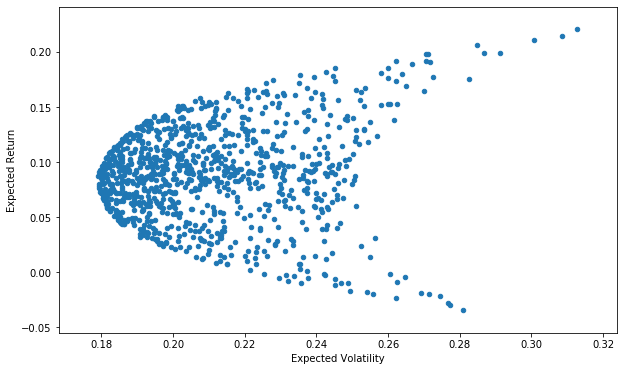

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [24]:
np.sum(weights * log_returns.mean()) * 250

0.13300166265876376

Expected Portfolio Return:

In [25]:
np.sum(weights * log_returns.mean()) * 250

0.13300166265876376

Expected Portfolio Variance:

In [26]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.0411635295103979

Expected Portfolio Volatility:

In [27]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.20288797280863619

*****

In [ ]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')